# Advanced Methods for Data Processing

# TOC:
* [Week 41: Data Preprocessing](#1-bullet)
* [Week 43 & Week 44: Analyzing the Data](#2-bullet)
* [Week 45: T-test](#3-bullet)
* [Week 46: Chi-Square test & ANOVA test](#4-bullet)
* [Week 47: Linear Regression](#5-bullet)
* [Week 48: Principle Component Analysis](#6-bullet)

---

# Week 41: Data Preprocessing <a class="anchor" id="1-bullet"></a>

- a. Select a dataset to work on and understand your dataset. Your activities may include tasks such as viewing random sample of data, getting total number of rows and columns.
- b. Check to see if your dataset contains any missing values and get the percentage of the missing data.
- c. Within the context of your dataset, decide what to do with the missing values and take necessary steps.
- d. Identify and drop duplicate values from the dataset.
- e. Separate one of your columns in the dataset that contains continuous numeric data into appropriate bins. You may use cut or qcut function.
- f. Identify any outliers within your dataset. If the dataset does not include any outlier, you can randomly mess up some portion of your data.
- g. Decide what to do with the outliers.
- h. Use any two of the following methods for identifying outliers. This task should have proper explanation on the method.
    - i. Using Visualization Tools (box plot, scatter plot,histogram)
    - ii. Z score (Mathematical function)
    - iii. Dbscan (Density Based Spatial Clustering of Applications with Noise)
    - iv. Isolation Forest
    - v. Using IQR Score

### <font color='pink'>a) Picking the dataset</font>

So the dataset we picked has [video games sales gathered till December 22nd 2016.](https://www.kaggle.com/xtyscut/video-games-sales-as-at-22-dec-2016csv)

Reason: It had a lot of columns and rows and seemed interesting.

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv")
data

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


### <font color='pink'>b) Check to see if your dataset contains any missing values and get the percentage of the missing data.</font>

In [3]:
missing_count = data.isnull().sum()
print(missing_count)

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64


In [4]:
total_data = np.product(data.shape)

total_missing = missing_count.sum()

percentage = (total_missing/total_data) * 100

print(round(percentage, 2),'%')

17.46 %


### <font color='pink'>c) Within the context of your dataset, decide what to do with the missing values and take necessary steps.</font>

We will fill all missing values with 0, because otherwise we would lose too much of the data.

In [18]:
dataset = pd.DataFrame(data.fillna(0))
dataset.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,80.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,0.0,0.0,0.0,0.0,0,0
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,83.0,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,80.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,0.0,0.0,0.0,0.0,0,0


### <font color='pink'>d) Identify and drop duplicate values from the dataset.</font>

In [19]:
dataset.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
16714    False
16715    False
16716    False
16717    False
16718    False
Length: 16719, dtype: bool

In [20]:
dataset.drop_duplicates()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,80.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,0.0,0.0,0.0,0.0,0,0
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,83.0,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,80.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,0.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,0.0,0.0,0.0,0.0,0,0
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,0.0,0.0,0.0,0.0,0,0
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,0.0,0.0,0.0,0.0,0,0
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,0.0,0.0,0.0,0.0,0,0


#### Check the column types

In [21]:
dataset.dtypes

Name                object
Platform            object
Year_of_Release    float64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score         float64
User_Count         float64
Developer           object
Rating              object
dtype: object

#### For some reason, User_Score is an object, even thought it really should be float, while also not matching the format of Critic_Score. Let's change it.
#### Also, let's change Year_of_Release to int

In [22]:
# Check the uniques
print("Unique values:",dataset['User_Score'].unique())
# Convert to float
dataset['User_Score'] = pd.to_numeric(dataset['User_Score'],errors='coerce')
# Multiply by 10 so it's similar to Critic_Score
data['User_Score'] = dataset['User_Score'].apply(lambda x: x*10)
print("Unique values:",dataset['User_Score'].unique())
# Change from float to int because it's a year
dataset['Year_of_Release'] = dataset['Year_of_Release'].astype(int)

dataset.dtypes

Unique values: [80.  0. 83. 85. 66. 84. 86. 77. 63. 74. 82. 90. 79. 81. 87. 71. 34. 53.
 48. 32. 89. 64. 78. 75. 26. 72. 92. 70. 73. 43. 76. 57. 50. 91. 65. 88.
 69. 94. 68. 61. 67. 54. 40. 49. 45. 93. 62. 42. 60. 37. 41. 58. 56. 55.
 44. 46. 59. 39. 31. 29. 52. 33. 47. 51. 35. 25. 19. 30. 27. 22. 20. 95.
 21. 36. 28. 18. 38. 16. 96. 24. 17. 11.  3. 15.  7. 12. 23.  5. 13.  2.
  6. 14.  9. 10. 97.]
Unique values: [80.  0. 83. 85. 66. 84. 86. 77. 63. 74. 82. 90. 79. 81. 87. 71. 34. 53.
 48. 32. 89. 64. 78. 75. 26. 72. 92. 70. 73. 43. 76. 57. 50. 91. 65. 88.
 69. 94. 68. 61. 67. 54. 40. 49. 45. 93. 62. 42. 60. 37. 41. 58. 56. 55.
 44. 46. 59. 39. 31. 29. 52. 33. 47. 51. 35. 25. 19. 30. 27. 22. 20. 95.
 21. 36. 28. 18. 38. 16. 96. 24. 17. 11.  3. 15.  7. 12. 23.  5. 13.  2.
  6. 14.  9. 10. 97.]


Name                object
Platform            object
Year_of_Release      int64
Genre               object
Publisher           object
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score         float64
User_Count         float64
Developer           object
Rating              object
dtype: object

### <font color='pink'>e) Separate one of your columns in the dataset that contains continuous numeric data into appropriate bins. You may use cut or qcut function.</font>

### Now, we could do this with the "Global_Sales" column:

In [23]:
global_sales = dataset['Global_Sales']
global_sales_rated = pd.cut(global_sales, 3, labels=["$", "$$", "$$$"])
global_sales_rated

0        $$$
1         $$
2         $$
3         $$
4         $$
        ... 
16714      $
16715      $
16716      $
16717      $
16718      $
Name: Global_Sales, Length: 16719, dtype: category
Categories (3, object): [$ < $$ < $$$]

### ...Or even with "Critic_Score" and "User_Score"...

In [24]:
scores_crit = dataset['Critic_Score']
scores_crit_rated = pd.cut(scores_crit, 10, labels=[1,2,3,4,5,6,7,8,9,10])
scores_user = dataset['User_Score']
scores_user_rated = pd.cut(scores_user, 10, labels=[1,2,3,4,5,6,7,8,9,10])
scores_crit_rated

0        8
1        1
2        9
3        9
4        1
        ..
16714    1
16715    1
16716    1
16717    1
16718    1
Name: Critic_Score, Length: 16719, dtype: category
Categories (10, int64): [1 < 2 < 3 < 4 ... 7 < 8 < 9 < 10]

### ...But this is unnecessary in our dataset, it would just makes things too confusing.

#### Dropping the "Name", "Publisher", and "Developer" columns, because they aren't usefull or relevant in this context.

We couldn't use them in any machine learning or anything and it doesn't really matter who made the game or what even the game is.

In [25]:
print("Unique values in Name:",len(dataset['Name'].unique()))

print("Unique values: in Platform:",len(dataset['Platform'].unique()))

print("Unique values: in Genre:",dataset['Genre'].unique())

print("Unique values: in Publisher:",len(dataset['Publisher'].unique()))

print("Unique values: in Developer:",len(dataset['Developer'].unique()))

print("Unique values: in Rating:",dataset['Rating'].unique())

dataset = dataset.drop(['Publisher', 'Name', 'Developer'], axis=1)

#print("Unique values:",dataset['Publisher'].unique())

Unique values in Name: 11563
Unique values: in Platform: 31
Unique values: in Genre: ['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' 0]
Unique values: in Publisher: 582
Unique values: in Developer: 1697
Unique values: in Rating: ['E' 0 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


#### Converting the ordinal- and nominal attributes from string to numeric.

These are the Rating and Genre and Platform columns

Note: "E", "K-A" and "EC" mean nowadays the same: "Everyone". "K-A" and "EC" are older versions of it that now have been depracated. That's why they are assigned the same values.

In [26]:
dataset_gategories = dataset.copy()
dataset = dataset.replace(['E', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],[3, 18, 15, 10, 3, 20, 3, 0])
dataset = dataset.replace(['Sports','Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc', 'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure', 'Strategy'],
                          [1,2,3,4,5,6,7,8,9,10,11,12])

# We can also just use scikit-learn's LabelEncoder to convert the string labels into numeric
# Note: If the column has multiple types of values (like strings and ints), it throws and error
from sklearn.preprocessing import LabelEncoder
# Instantiate LabelEncoder
le = LabelEncoder()
# Encode single column status
dataset['Platform'] = le.fit_transform(dataset['Platform'])

dataset[20:30]

,Platform,Year_of_Release,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
20,4,2006,4,6.38,4.46,6.04,1.36,18.25,0.0,0.0,0.0,0.0,0
21,5,1989,2,10.83,2.71,4.18,0.42,18.14,0.0,0.0,0.0,0.0,0
22,11,1988,2,9.54,3.44,3.84,0.46,17.28,0.0,0.0,0.0,0.0,0
23,28,2013,9,9.66,5.14,0.06,1.41,16.27,97.0,58.0,81.0,3711.0,18
24,16,2002,9,8.41,5.49,0.47,1.78,16.15,95.0,62.0,87.0,730.0,18
25,6,2002,4,6.06,3.90,5.38,0.50,15.85,0.0,0.0,0.0,0.0,0
26,4,2005,5,3.43,5.35,5.32,1.18,15.29,77.0,37.0,71.0,19.0,3
27,4,2010,4,5.51,3.17,5.65,0.80,15.14,0.0,0.0,0.0,0.0,0
28,16,2001,3,6.85,5.09,1.87,1.16,14.98,95.0,54.0,84.0,314.0,3
29,28,2011,7,9.04,4.24,0.13,1.32,14.73,88.0,81.0,34.0,8713.0,18


### <font color='pink'>f) Identify any outliers within your dataset. If the dataset does not include any outlier, you can randomly mess up some portion of your data.</font>

Checking for outliers, which isn't really needed with this dataset

#### Z-score

In [27]:
from scipy.stats import norm
from scipy.stats import zscore

z_scores = zscore(dataset)
abs_z_scores = np.abs(z_scores)
    
# Remove rows that have outliers in at least one column
outliers = dataset[(abs_z_scores <= 2.5).all(axis=1)]
    
# Pidä vain ne rivit, jotka ovat +3 - -3 keskihajonnan sisällä.
filtered_entries = (abs_z_scores <= 2.5).all(axis=1)
df_clean = dataset[filtered_entries]

print(f"{'-'*30}\nOutliers\n")
print("Data with outliers: ", len(dataset))
print("Ouliers removed:    ", len(dataset) - len(df_clean))
print("Data after:         ", len(df_clean))
    
total_data = len(dataset)
total_missing = len(dataset) - len(df_clean)
percentage = (total_missing/total_data) * 100
percentage_remain = (1 - (total_missing/total_data)) * 100
print("Percent removed:    ",round(percentage, 2),'%')
print("Percent remaining:  ",round(percentage_remain, 2),'%')
print(f"{'-'*30}")
#dataset = df_clean
df_clean

------------------------------
Outliers

Data with outliers:  16719
Ouliers removed:     1416
Data after:          15303
Percent removed:     8.47 %
Percent remaining:   91.53 %
------------------------------


,Platform,Year_of_Release,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
259,2,2011,9,2.09,1.31,0.62,0.31,4.33,0.0,0.0,0.0,0.0,0
310,26,2009,1,2.09,1.35,0.06,0.40,3.90,81.0,27.0,87.0,39.0,3
311,16,2003,1,2.29,1.17,0.01,0.42,3.90,90.0,38.0,87.0,121.0,15
322,5,1992,9,2.21,0.96,0.54,0.13,3.83,0.0,0.0,0.0,0.0,0
327,15,1996,9,1.82,1.24,0.47,0.25,3.77,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,17,2016,9,0.00,0.00,0.01,0.00,0.01,0.0,0.0,0.0,0.0,0
16715,28,2006,1,0.00,0.01,0.00,0.00,0.01,0.0,0.0,0.0,0.0,0
16716,20,2016,11,0.00,0.00,0.01,0.00,0.01,0.0,0.0,0.0,0.0,0
16717,6,2003,2,0.01,0.00,0.00,0.00,0.01,0.0,0.0,0.0,0.0,0


### <font color='pink'>g) Decide what to do with the outliers.</font>

### Outliers in this type of data is inevitable: One game might have a score of 1 and another 10. Most games aren't that bad or good, most are 5-8, so 1 and 10 would be outliers. But they are required so we won't be deleting any outliers

---

# Week 43 & Week 44: Analyzing the Data <a class="anchor" id="2-bullet"></a>

- a. Data Objects & Attribute Types
    - i. Use your dataset and print columns name that represent nominal attributes.
    - ii. Use your dataset and print columns name that represent binary attributes.
    - iii. Use your dataset and print columns name that represent ordinal
    attributes.

- b. Measurement of the central tendency
    - i. Calculate the mean for any specific column in your dataset.
    - ii. Calculate the median for any specific column in your dataset.
    - iii. Calculate the mode for any specific column in your dataset.

- c. Measures of dispersion of data (Use appropriate visualization wherever applicable)
    - i. Calculate the range for one of your columns in the dataset.
    - ii. Calculate the 60% and 70% quantile for one of your columns in the dataset.
    - iii. Calculate the Interquartile Range for one of your columns in the dataset.
    - iv. Visualize the skewness for couple of your columns and briefly explain if it is positively or negatively skewed and what does that mean.
    - v. Calculate the kurtosis for couple of your columns and explain the type of kurtosis it belongs to.
    - vi. Calculate the variance and standard deviation of couple of your columns and explain the results of variance and standard deviation.

## A)

### <font color='pink'>a. i : Print nominal attributes.</font>

In [58]:
dataset.columns

Index(['Platform', 'Year_of_Release', 'Genre', 'NA_Sales', 'EU_Sales',
       'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Rating'],
      dtype='object')

In [59]:
print("Mean for User_Score")
print(dataset['Global_Sales'].mean()) #5.b.1
print("Range of Eu_sales:", dataset['EU_Sales'].max()-dataset['EU_Sales'].min())#5.c.1

Mean for User_Score
0.3291557211004378
Range of Eu_sales: 1.4


### <font color='pink'>a. ii : Print binary attributes</font>

In [60]:
print("Binary attributes: None")

Binary attributes: None


### <font color='pink'>a. iii : Print ordinal attributes.</font>

In [61]:
dataset['Rating']

259       0
310       3
311      15
322       0
327       0
         ..
16714     0
16715     0
16716     0
16717     0
16718     0
Name: Rating, Length: 15303, dtype: int64

---
# B)

### <font color='pink'>b. i : Calculate the mean</font>

In [62]:
print("These are nominal attributes")
print(dataset['Platform'], dataset['Genre'],dataset['Year_of_Release']) #5.a.1

These are nominal attributes
259       2
310      26
311      16
322       5
327      15
         ..
16714    17
16715    28
16716    20
16717     6
16718    20
Name: Platform, Length: 15303, dtype: int64 259       9
310       1
311       1
322       9
327       9
         ..
16714     9
16715     1
16716    11
16717     2
16718     8
Name: Genre, Length: 15303, dtype: int64 259      2011
310      2009
311      2003
322      1992
327      1996
         ... 
16714    2016
16715    2006
16716    2016
16717    2003
16718    2016
Name: Year_of_Release, Length: 15303, dtype: int64


### <font color='pink'>b. ii : Calculate the median</font>

In [63]:
print("Median for Global Sales:", dataset['Global_Sales'].median())

Median for Global Sales: 0.15


### <font color='pink'>b. iii : Calculate the mode</font>

In [64]:
dataset.columns

Index(['Platform', 'Year_of_Release', 'Genre', 'NA_Sales', 'EU_Sales',
       'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Rating'],
      dtype='object')

---
# C)

### <font color='pink'>c. i : Calculate the range</font>

In [65]:
dataset['Rating'].mode()

0    0
dtype: int64

### <font color='pink'>c. ii : Calculate the 60% and 70% quantile</font>

In [66]:
dataset['Global_Sales'].quantile([0.7,0.6])

0.7    0.31
0.6    0.21
Name: Global_Sales, dtype: float64

### <font color='pink'>c. iii : Calculate the Interquartile Range</font>

In [67]:
#lets calucate the quantile
# DataFrame.quantile(q=0.5, axis=0, numeric_only=True, interpolation='linear')
# qfloat or array-like, default 0.5 (50% quantile)
# Value between 0 <= q <= 1, the quantile(s) to compute
# calucating the 40% quantile
dataset['Rating'].quantile([0.4])
# calcualting the 40% and 60%
dataset['Rating'].quantile([0.4,0.6])

0.4    0.0
0.6    3.0
Name: Rating, dtype: float64

### <font color='pink'>c. iv : Visualize the skewness for couple of your columns and briefly explain if it is positively or negatively skewed and what does that mean.</font>

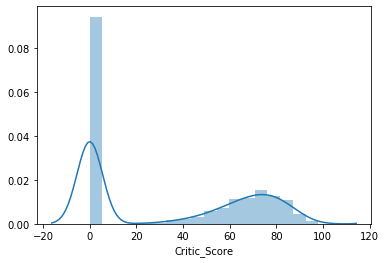

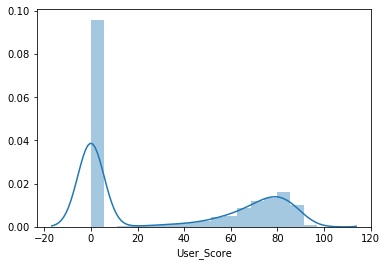

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

df1= dataset['Critic_Score'].fillna(method='bfill', axis=0).fillna(0)
# seaborn is a popular visualization library
sns.distplot(df1)
plt.show()

#This is slightly positive Skew as long as we dont count 0 values
df2= dataset['User_Score'].fillna(method='bfill', axis=0).fillna(0)
sns.distplot(df2)
plt.show()

#### The distribution is slightly positivly skewed, which means that most people, critics or users, give games rating between 6-8, meaning "Great game"

### <font color='pink'>c. v : Calculate the kurtosis for couple of your columns and explain the type of kurtosis it belongs to.</font>

In [34]:
print("Kurtosis of Global_Sales:", dataset['Global_Sales'].kurtosis())
print("Kurtosis of Other_Sales:", dataset['Other_Sales'].kurtosis())
print(" Positive values of kurtosis indicate that a distribution is peaked and possess thick tails. Leptokurtic distributions have positive kurtosis values.")

Kurtosis of Global_Sales: 604.0982613416558
Kurtosis of Other_Sales: 1055.1277028387879
 Positive values of kurtosis indicate that a distribution is peaked and possess thick tails. Leptokurtic distributions have positive kurtosis values.


### <font color='pink'>c. vi : Calculate the variance and standard deviation of couple of your columns and explain the results of variance and standard deviation.</font>

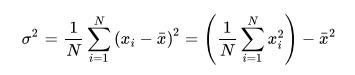

In [71]:
#Find the mean of the array data values
mean_value = np.mean(dataset)

#Find the standard deviation of the array data values
standard_deviation = np.std(dataset)

#create an array consisting of the standard deviations from the mean
array = mean_value/standard_deviation
array

Platform             1.875125
Year_of_Release    348.995661
Genre                1.821758
NA_Sales             0.587231
EU_Sales             0.497002
JP_Sales             0.403639
Other_Sales          0.508479
Global_Sales         0.685028
Critic_Score         0.897034
Critic_Count         0.705355
User_Score           0.834386
User_Count           0.307805
Rating               0.842686
dtype: float64

In [75]:
# standard deviation of the specific column
print("Maximum Global sale: ",max(dataset['Global_Sales']))
print("Mininum Global sale: ",min(dataset['Global_Sales']))
print("STD:",dataset['Global_Sales'].std())

Maximum Global sale:  4.33
Mininum Global sale:  0.01
STD: 0.48051522607881075


#### Visualizing the standard deviation of Global sales in regards the change of Critic Score

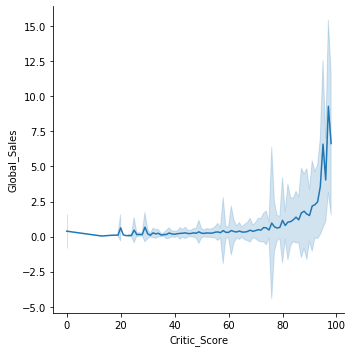

In [35]:
# The shaded area show the standard deviation
sns.relplot(x="Critic_Score", y="Global_Sales",
            data=dataset,
            kind="line",
            ci="sd")
# Show plot
plt.show()

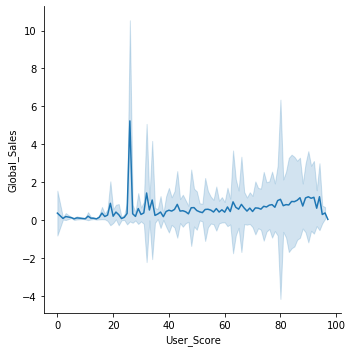

In [31]:
# The shaded area show the standard deviation
sns.relplot(x="User_Score", y="Global_Sales",
            data=dataset,
            kind="line",
            ci="sd")
# Show plot
plt.show()

In [108]:
# computing the variance
dataset.var()

Platform             69.943988
Year_of_Release      33.056331
Genre                11.910118
NA_Sales              0.086978
EU_Sales              0.029085
JP_Sales              0.011880
Other_Sales           0.002810
Global_Sales          0.230895
Critic_Score       1215.273699
Critic_Count        218.944996
User_Score         1321.299613
User_Count         7455.739043
Rating               43.391991
dtype: float64

#### So it seems that Critic_Score, Critic_Count, User_Score and User_Count have the highest variances, so they are the most robust a machine learning model's prediction...

#### ...But it also introduces a lot of estimation errors.

#### Visualizing the variance of Global sales in regards the change of Critic Score using the [Bias-Variance Tradeoff](https://towardsdatascience.com/understanding-the-bias-variance-tradeoff-and-visualizing-it-with-example-and-python-code-7af2681a10a7)

bias:  [6.351792739123729, 7.897369518970668, 10.266166607021285, 19.754691097566752, 15.402958169876817, 12.757440862668066]
var:  [9.512745610255536e-28, 3.231325150611531e-27, 7.232227380643741e-27, 3.736975823172582e-26, 2.6441454573060726e-26, 2.781925293318725e-26]


/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)


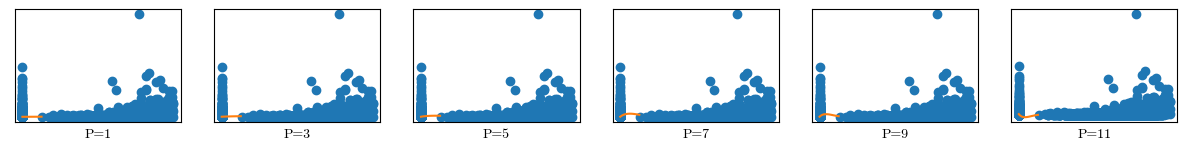

/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/conda/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


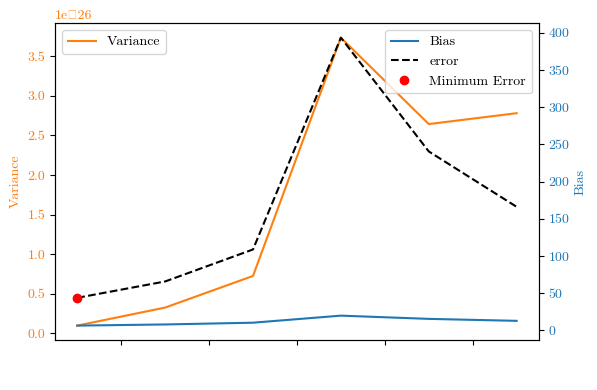

In [184]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import random

def dist_function(x):
    f_x = np.sin(x)
    return f_x

def gen_data(x):
    f_x = dist_function(x)
    b = 0.4
    y = f_x + np.random.uniform(-b, b, len(x))
    sigma = 1/12*(2*b)**2
    return y, f_x, sigma


def get_rand_data(len_ratio, x, y, f_x):
    m = len(x)
    m_new = int(np.round(len_ratio*m))
    ind = random.sample(range(m), m_new)
    ind = np.sort(ind)

    y1 = dataset['Global_Sales']
    x1 = dataset['Critic_Score']
    f_x1 = f_x[ind]

    return x1, y1, f_x1


x_orig = np.arange(0, 4 * np.pi, .2)

y_orig, f_x_orig, sigma = gen_data(x_orig)
p_order = [1, 3, 5, 7, 9, 11]
num_data = 2000

f, ax = plt.subplots(1,len(p_order), figsize=(15, 1.5), dpi=100, facecolor='w', edgecolor='k')
t = np.arange(0.1, 4*np.pi, .2)
P=[]
bb=[]
vv=[]
for i, p_val in enumerate(p_order):
    exp_f_x = np.zeros(len(t))
    exp_f_x_plot = np.zeros(len(x_orig))
    var = np.zeros(len(t))
    for j in range(num_data):
        x, y, f_x = get_rand_data(0.7, x_orig, y_orig, f_x_orig)
        p = np.poly1d(np.polyfit(x, y, p_val))
        P.append(p)
        exp_f_x = exp_f_x + p(t)
        exp_f_x_plot = exp_f_x_plot + p(x_orig)

    exp_f_x = exp_f_x / num_data
    exp_f_x_plot = exp_f_x_plot / num_data
    ax[i].plot(x, y, 'o', x_orig, exp_f_x_plot, '-')
    plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])
    ax[i].set_xlabel('P='+str(p_order[i]))
    bias = np.linalg.norm(exp_f_x-dist_function(t))
    bb.append(bias)

    for j in range(num_data):
        p_t = P.pop(0)
        var = var + np.square(p_t(t)-exp_f_x)
    var = var / num_data
    variance = np.linalg.norm(var)
    vv.append(variance)


print("bias: ", bb)
print("var: ",vv)

fig, ax1 = plt.subplots(dpi=100)

color = 'tab:orange'
ax1.set_xlabel('Polynomial order', color="white")
ax1.set_ylabel('Variance', color=color)
ax1.plot(p_order, vv, color=color, label = 'Variance')
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', labelcolor="white")

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Bias', color=color)
ax2.plot(p_order, bb, color=color,  label = 'Bias')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()

error = np.square(bb)+vv+sigma*len(t)
min_ind = np.argmin(error)
plt.plot(p_order, error, 'k--', label = 'error')
plt.plot(p_order[min_ind], error[min_ind], 'ro', label= 'Minimum Error')
leg = ax2.legend(loc='upper right')
leg = ax1.legend(loc='upper left')
plt.show()

### So the higher the degree of the polynomial, the worse is the approximation.

The selection of this polynomial is dependent upon
- The amount and nature of the noise in the samples data
- The amount of training data

In [ ]:
cov = np.cov(dataset, bias=True)
labs = dataset.columns.tolist()

sns.heatmap(cov, annot=True, fmt='g', xticklabels=labs, yticklabels=labs)
plt.show()
cov

---

# Week 45: T-test <a class="anchor" id="3-bullet"></a>

- a. Create a Null and alternative hypothesis that is applicable to your data set or just any hypothesis.
- b. Conduct one sample t-test by checking if a sample mean differs against a known mean.
- c. Conduct two sample t-test by investigating two population means.
- d. Conduct a paired sample t-test by investigating the differences between samples of the same group at different points of time.


## Hypothesis Testing

Hypothesis is a statement, claim or assumption regarding a population parameter.
- The major purpose of the statistic is to test a hypothesis.
- Hypothesis should be testable through experiments or observations.

### Null Hypothesis H 0
- It is simply a commonly accepted fact.
- If there are little evidences against the null hypothesis, you accept it.
- If there are more evidences against the null hypotehsis, you reject the null in favour of the alternative hypothesis.

---

## <font color='pink'>a) Create a Null and alternative hypothesis that is applicable to your data set or just any hypothesis.</font>

### <font color='pink'>Our hypothesis:</font>

If the game has big critic score value, it will have a big global sales value.

This is because better reviewed games will sell more. It's a form of the "good worth of mouth".

## <font color='pink'>b) One-Sample T-Test</font>

- A one-sample t-test checks whether a sample mean differs from the population mean.

In [42]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math
# to perform one sample t-test
stats.ttest_1samp(a=dataset['Global_Sales'], popmean=14)

Ttest_1sampResult(statistic=-1124.8788543944718, pvalue=0.0)

#### It doesn't

---

## <font color='pink'>c) Two Sample T-test</font>
- A two-sample t-test investigates the diffrences between two population means.
- In a two-sample test, the null hypothesis is that the means of both groups are the same.
- Unlike the one sample-test where we test against a known population parameter, the two sample test only involves sample means.
- You can conduct a two-sample t-test by passing with the stats.ttest_ind() function

Conduct two sample t-test by investigating two population means

- T-Test compares if two averages are different from each other.
- T-Test tells how significant the differences are and if those differeces have occured by chance

Types of t-tests:
- A Paired sample t-test : differences between samples of the same group at different points in time.
-  One-Sample T-test: it tests the mean of a single group against a known mean
- Two-Sample T-test: investigates the diffrences between two population means.

In [43]:
# Picking Global sales and critic score as samples
s1 = dataset['Global_Sales']
s2 = dataset['Critic_Score']

# lets find variance for each group
print("Variance for Sample 1: ",np.var(s1),"Variance for Sample 2: ", np.var(s2))

# ratio of the larger sample variance to the smaller variance
print ("Ratio")

Variance for Sample 1:  2.3959598341587824 Variance for Sample 2:  1282.8319227204902
Ratio


In [44]:
# ratio of the larger sample variance to the smaller variance
print ("Ratio:",7.69/6.88 )

# the ratio is 1.11 which is less that 4 therfore we assume that the population variances are equal.
#Therefore we will proceeed with two sample t-test with equal variances

Ratio: 1.117732558139535


In [45]:
import scipy.stats as stats

# let's conduct two sample t-test with equal variances
stats.ttest_ind(a=s1, b=s2, equal_var=True)

Ttest_indResult(statistic=-119.13599869423447, pvalue=0.0)

### interpretion of the above result
#### The value of the test is greater than the alpha 0.05, we fail to reject the null hypothesis. There is no sufficient evidence.

---

## <font color='pink'>d) Paired T-Test</font>
- The two sample t-test is designed for testing differences between independent groups.
- Sometimes you might be interested in testing differences between samples of the same group at different points in time.
- For instance, a hospital might want to test whether a weight-loss drug works by checking the weights of the same group patients before and after treatment.
- A paired t-test lets you check whether the means of samples from the same group differ.

- A two-sample t-test investigates the diffrences between two population means.
- In a two-sample test, the null hypothesis is that the means of both groups are the same.
- Unlike the one sample-test where we test against a known population parameter, the two sample test only involves sample means.
- You can conduct a two-sample t-test by passing with the stats.ttest_ind() function.

In [53]:
dataset.dtypes

Platform             int64
Year_of_Release      int64
Genre                int64
NA_Sales           float64
EU_Sales           float64
JP_Sales           float64
Other_Sales        float64
Global_Sales       float64
Critic_Score       float64
Critic_Count       float64
User_Score          object
User_Count         float64
Rating               int64
dtype: object

In [24]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math
#df=[14,15,13,16,21,13,14,18,12,13,14,15,13,16,21,13,14,18,12,13]
# to perform one sample t-test
#stats.ttest_1samp(a=dataset, popmean=14)


In [47]:
np.random.seed(11)

before= stats.norm.rvs(scale=30, loc=250, size=100)
after = before + stats.norm.rvs(scale=5, loc=-1.25, size=100)

print(before)
print(after)

[302.48364224 241.4178101  235.46304603 170.40044322 249.75146112
 240.41105909 233.90111913 259.46208005 262.63152149 218.03191059
 223.4128099  235.72799522 270.69046931 266.83576528 210.83354471
 216.41574215 272.10512174 297.23902219 249.06774735 229.49660118
 282.86889096 240.71270088 271.77256674 296.472149   268.90239467
 252.20479711 271.96814062 230.72273823 244.65720474 232.78136322
 243.86874053 235.405147   244.42674028 238.5839075  252.66932906
 251.91014984 258.89041324 292.08313358 203.59412297 288.86855754
 242.88248663 213.0296138  244.82740698 252.75515125 282.02675371
 218.15096655 256.52044624 253.53458513 199.47667321 214.42734204
 268.00306017 270.86701766 282.6313258  266.01465147 261.85636039
 253.68602588 286.27304926 224.70801697 245.74319257 261.56062414
 202.67517074 289.32830921 226.21404977 247.84751763 314.70023277
 225.11688243 234.11883917 296.85111081 217.59418524 237.03827144
 265.48252112 263.66178581 267.81058609 261.11519003 290.36134216
 280.47826

In [48]:
np.random.seed(11)

before = dataset['Global_Sales']
after = before + dataset['Critic_Score']

weight_df = pd.DataFrame({"weight_before":before,
                          "weight_after":after,
                          "weight_change":after-before})

weight_df.describe() # Check a summary of the data

,weight_before,weight_after,weight_change
count,16719.000000,16719.000000,16719.000000
mean,0.533543,34.099545,33.566003
std,1.547935,36.080379,35.817714
min,0.010000,0.010000,0.000000
25%,0.060000,0.110000,0.000000
50%,0.170000,2.280000,0.000000
75%,0.470000,70.670000,70.000000
max,82.530000,158.530000,98.000000


In [49]:
stats.ttest_rel(a = before,b =after)
#since the Pvalue is less than 0.05, we reject the null hypothesis.

Ttest_relResult(statistic=-121.17329203872768, pvalue=0.0)

In [58]:
'''data[:, :-1], data[:, -1]'''

X = dataset.iloc[:,:2]
Y = dataset.iloc[:,2]
print(X)
print(Y)

       Platform  Year_of_Release
0             1           2006.0
1             2           1985.0
2             1           2008.0
3             1           2009.0
4             3           1996.0
...         ...              ...
16714         6           2016.0
16715         5           2006.0
16716        23           2016.0
16717         9           2003.0
16718        23           2016.0

[16719 rows x 2 columns]
0         1
1         2
2         3
3         1
4         4
         ..
16714     9
16715     1
16716    11
16717     2
16718     8
Name: Genre, Length: 16719, dtype: int64


---

# Week 46: Chi-Square test & ANOVA test <a class="anchor" id="4-bullet"></a>

- a. For your dataset, pick two categorical variables and check the Null Hypothesis if the two categorical variables are independent to each other. Use Chi-Sqare test for independence.
- b. Conduct Chi-square (χ2) Goodness of Fit test by selecting a Null hypothesis based on the data set that you are currently working on.
- c. Conduct One-Way Anova test on your data set to test whether the group means differ from one another.

### <font color='pink'>a) For your dataset, pick two categorical variables and check the Null Hypothesis if the two categorical variables are independent to each other. Use Chi-Sqare test for independence.</font>
#### Let's see if the "Platform" and "Genre" have any correlation

In [147]:
dataset_gategories

,Platform,Year_of_Release,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii,2006,Sports,41.36,28.96,3.77,8.45,82.53,76.0,51.0,800.0,322.0,E
1,NES,1985,Platform,29.08,3.58,6.81,0.77,40.24,0.0,0.0,0.0,0.0,0
2,Wii,2008,Racing,15.68,12.76,3.79,3.29,35.52,82.0,73.0,830.0,709.0,E
3,Wii,2009,Sports,15.61,10.93,3.28,2.95,32.77,80.0,73.0,800.0,192.0,E
4,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,31.37,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,PS3,2016,Action,0.00,0.00,0.01,0.00,0.01,0.0,0.0,0.0,0.0,0
16715,X360,2006,Sports,0.00,0.01,0.00,0.00,0.01,0.0,0.0,0.0,0.0,0
16716,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.01,0.0,0.0,0.0,0.0,0
16717,GBA,2003,Platform,0.01,0.00,0.00,0.00,0.01,0.0,0.0,0.0,0.0,0


In [157]:
import numpy as np
import pandas as pd
import scipy.stats as stats

# run chi-square test for independence check what it returns below:
sale_df = dataset[["Platform","Genre"]]

chi2,p,dof, exp = stats.chi2_contingency(sale_df)
print("The chi sqaure value:", chi2)
print ("PValue:              ", p)
print ("Degree of Freedom:   ", dof)
print ("Expected Frequencies: ", exp)
alpha = 0.05
if p <= alpha:
    print (p, ": We reject the null hypothesis")
else:
    print (p,": We failed to reject the null hypothesis")

The chi sqaure value: 53421.55572632447
PValue:               0.0
Degree of Freedom:    16718
Expected Frequencies:  [[19.33793163  7.66206837]
 [ 9.31085597  3.68914403]
 [20.77037101  8.22962899]
 ...
 [22.20281039  8.79718961]
 [ 5.72975752  2.27024248]
 [20.05415132  7.94584868]]
0.0 : We reject the null hypothesis


### <font color='pink'>b) Conduct Chi-square (χ2) Goodness of Fit test by selecting a Null hypothesis based on the data set that you are currently working on.</font>

In [156]:
import scipy.stats as stats

Platform = dataset["Platform"]
Genre = dataset["Genre"]

Platform_table = pd.crosstab(index=Platform, columns="count")
Genre_table = pd.crosstab(index=Genre, columns="count")

observed = Genre_table

# Get population ratios
Platform_ratios = Platform_table/len(Platform)
# Get expected counts
expected = Platform_ratios * len(Genre)

stats.chisquare(f_obs= Platform_ratios, # Array of observed counts
                f_exp= expected) # Array of expected counts

Power_divergenceResult(statistic=array([16717.00005981]), pvalue=array([0.]))

### <font color='pink'>c) Conduct One-Way Anova test on your data set to test whether the group means differ from one another.</font>

- The one-way ANOVA tests whether the mean of some numeric variable differs across the levels of one categorical variable.
- It essentially answers the question: do any of the group means differ from one another?

In [159]:
ratings = dataset['Rating'].unique()
ratings

array([ 3,  0, 18, 15, 10, 20])

In [167]:
ratings = dataset['Rating']
sales = dataset['Global_Sales']

# Group age data by race
game_frame = pd.DataFrame({"Global_Sales":sales,"Rating":ratings})
groups = game_frame.groupby("Rating").groups
# Etract individual groups

# Cannot use the "rating pending" rating, because the ANOVA throws an error of dividing by 0
#pending = ratings[groups[0]]
everyone = ratings[groups[3]]
everyone10 = ratings[groups[10]]
teen = ratings[groups[15]]
mature = ratings[groups[18]]
adults_only = ratings[groups[20]]
# Perform the ANOVA
stats.f_oneway(everyone, everyone10, teen, mature, adults_only)

F_onewayResult(statistic=7.904012053651694e+18, pvalue=0.0)

In [55]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

moore_lm = ols("Critic_Score ~ C(Global_Sales,Sum)", data= dataset).fit()
table = sm.stats.anova_lm(moore_lm, typ=2)
table

,sum_sq,df,F,PR(>F)
"C(Global_Sales, Sum)",2.965784e+06,628.0,4.111399,2.687735e-211
Residual,1.848188e+07,16090.0,NaN,NaN


---

# Week 47: Linear Regression <a class="anchor" id="5-bullet"></a>

- a. Conduct simple linear regression on any two variables in your data set.
    - i. Get the ‘slope’, intercept, r and p value
    - ii. Interpret the ‘r’ value of your dataset to explain the relationship and if it can be used to predict the future value.
    - iii. Predict few values for your dataset.
- b. Conduct linear regression on multiple variables in your data set and predict few values.

## <font color='pink'>a) Conduct simple linear regression on any two variables in your data set.</font>

### <font color='pink'>a) i. Get the ‘slope’, intercept, r and p value</font>

ii. Interpret the ‘r’ value of your dataset to explain the relationship and if it can be used to predict the future value.
iii. Predict few values for your dataset.
b. Conduct linear regression on multiple variables in your data set and predict few values.

0.006426421866634216 0.3178333819405196 0.14870115587599078 2.8077348917007883e-83


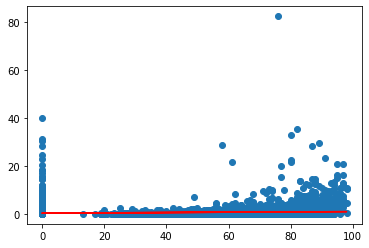

In [168]:
import scipy.stats as stats

x = dataset['Critic_Score']
y = dataset['Global_Sales']

# lets return some important values of the Linear regression
slope, intercept, r, p, std_err = stats.linregress(x, y)

# create a function that returns a new value
def func1(x):
    return slope * x + intercept

model = list(map(func1, x))
plt.scatter(x, y)

print(slope, intercept, r, p)
plt.plot(x, model, color="r")

plt.show()

### <font color='pink'>a) ii. Interpret the ‘r’ value of your dataset to explain the relationship and if it can be used to predict the future value.</font>

In [172]:
print(r)
# This r value is very low and this cant be used to predict the furute, atleast with these x and y values 

0.14870115587599078


### <font color='pink'>a) iii. Predict few values for your dataset.</font>

Let's do a slightly different linear regression:

### How much is the global sale gonna be for a game that sells certain amounts in other regions?

In [173]:
from sklearn.model_selection import train_test_split

x = dataset[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
y = dataset['Global_Sales']

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.5, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(8359, 4)
(8360, 4)
(8359,)
(8360,)


In [174]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 0.00520044536750305
R2 score is 0.9999851267973707


The model performance for testing set
--------------------------------------
RMSE is 0.005219482297129093
R2 score is 0.9999908376019765


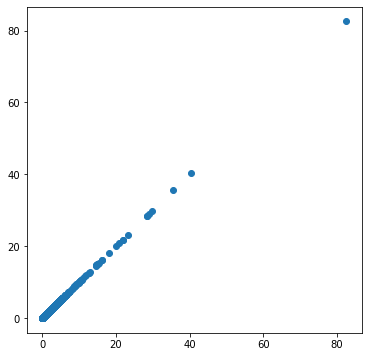

Original:  16719
Outliers:  15303
Outliers removed:  1416


In [175]:
# plotting the y_test vs y_pred
# ideally should be a straight line
plt.figure(figsize=(6,6))
plt.scatter(Y_test, y_test_predict)
plt.show()

print("Original: ", len(dataset))
print("Outliers: ", len(outliers))
print("Outliers removed: ", len(dataset) - len(outliers))

In [176]:
print(lin_model.coef_)
print(lin_model.intercept_)

[0.99987875 0.99979486 1.00013564 0.99950737]
0.00028112110975786475


### <font color='pink'>b) Conduct linear regression on multiple variables in your data set and predict few values.</font>

In [84]:
#print("NA sales 15, EU sales 10, JP sales 3, Other sales 3, Global sales 40\nThe predicted critic score for a game that sells like this: ",lin_model.predict([[15,10,3,3,40]]))
print("North-America sales 40, EU sales 10, Japan sales 10, Other sales 10\nGlobal sales for a game that sells like this: ", lin_model.predict([[40,10,10,10]]))

North-America sales 40, EU sales 10, Japan sales 10, Other sales 10
Global sales for a game that sells like this:  [69.98981007]


---

# Week 48: Principle Component Analysis <a class="anchor" id="6-bullet"></a>

- a. Conduct principle component analysis to reduce the dimensionality of large data sets that is you are required to transform a large set of variables into a small one without loosing too much of the information.

### <font color='pink'>a) Conduct principle component analysis to reduce the dimensionality of large data sets that is you are required to transform a large set of variables into a small one without loosing too much of the information.</font>

#### We create a new x table: Critic_Score and User_Score. These really could just be the same thing, making just the 'Score'

In [180]:
from sklearn.decomposition import PCA

x = dataset[['Critic_Score', 'User_Score']]

#dataset_standardized = (x - x.min())/x.std()

pca=PCA(n_components=1)

principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents,
                           columns = ['Score'])

print("Principal axes:", pca.components_)
print("Explained variance:", pca.explained_variance_)
print("Mean:", pca.mean_)

principalDf.head()

Principal axes: [[0.69428862 0.71969669]]
Explained variance: [2403.23522902]
Mean: [33.56600275 32.34589389]


,Score
0,63.757943
1,-46.583726
2,70.082765
3,66.535098
4,-46.583726


length:  2403.23522902167
vector:  [0.69428862 0.71969669]
v:  [102.10792237 105.84464677]


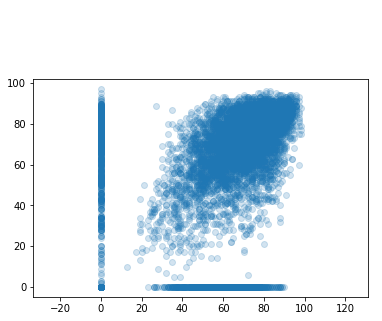

In [181]:
def arrow(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

plt.scatter(x.iloc[:, 0], x.iloc[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    print("length: ",length)
    print("vector: ",vector)
    v = vector * 3 * np.sqrt(length)
    print("v: ", v)
    arrow(pca.mean_, pca.mean_ + v)
plt.axis('equal');

### Reducing dimensionality

original shape:    (16719, 2)
transformed shape: (16719, 1)


(-4.909856630824373, 102.90985663082436, -7.636138714085738, 101.9971271772817)

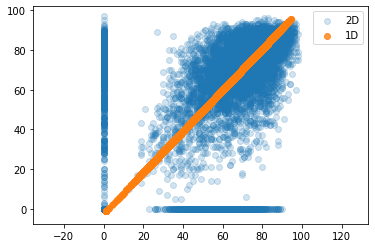

In [182]:
pca = PCA(n_components=1)
pca.fit(x)
X_pca = pca.transform(x)
print("original shape:   ", x.shape)
print("transformed shape:", X_pca.shape)

X_new = pca.inverse_transform(X_pca)
plt.scatter(x.iloc[:, 0], x.iloc[:, 1], alpha=0.2, label="2D")
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8, label="1D")
plt.legend()
plt.axis('equal')

---
#### Random tests

(15303, 1) (15303,)


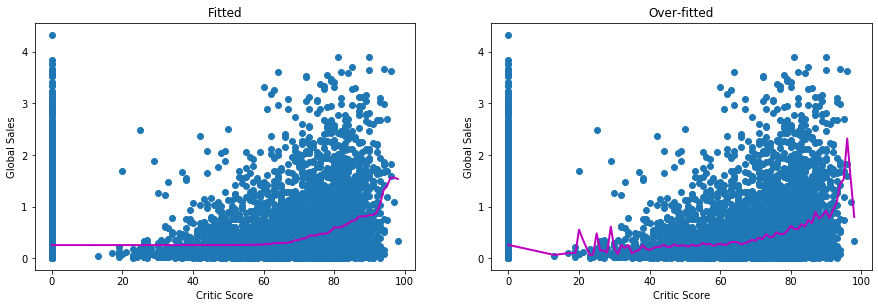

In [120]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and fit regressor
treeRF = RandomForestRegressor(criterion='mse',max_depth=3)
treeRF2 = RandomForestRegressor(criterion='mse',max_depth=20)

# Assign matrix X
X = dataset['Critic_Score'].values.reshape(-1, 1)
# Note: There's an easier way of using a 1D array:
#X = dataset[['Critic_Score']].values

# Assign vector y
y = dataset['Global_Sales'].values
print(X.shape, y.shape)

# Sort X and y by ascending values of X
sort_idx = X.flatten().argsort()
X = X[sort_idx]
y = y[sort_idx]
treeRF.fit(X, y)
treeRF2.fit(X, y)

plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
plt.scatter(X, y)
plt.plot(X, treeRF.predict(X), color='m', lw=2)
plt.xlabel('Critic Score')
plt.ylabel('Global Sales')
plt.title("Fitted")

plt.subplot(2, 2, 2)

plt.scatter(X, y)
plt.plot(X, treeRF2.predict(X), color='m', lw=2)
plt.xlabel('Critic Score')
plt.ylabel('Global Sales')
plt.title("Over-fitted")

plt.show()

---

### Standardazion, which again, won't be needed with this dataset

In [73]:
dataset_standardized = (dataset - dataset.min())/dataset.std()
dataset_standardized[0:10]

TypeError: unsupported operand type(s) for -: 'str' and 'float'

In [7]:
print("Mean: " + str(x_standardized.mean()))
print("Standard Deviation: " + str(x_standardized.std()))

Mean: 0.4240738943915651
Standard Deviation: 0.9999999999999998


In [15]:
results= list()
names = list()
scores = name
results.append(scores)
names.append(scores)
print('>%s %.3f (%.3f)' % (name, scores.mean(), scores.std()))

AttributeError: 'list' object has no attribute 'mean'

In [ ]:
# plot model performance for comparison
import matplotlib.pyplot as plt

plt.boxplot(results, labels=names, showmeans=True)
plt.show()

In [147]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=1, stratify=Y)

print('Labels counts in y: {}'.format(np.bincount(Y)))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [   2 2348  888 1249 1500  580 1750 1323  874 3370  849 1303  683]
Labels counts in y_train: [   2 2113  799 1124 1350  522 1575 1191  786 3033  764 1173  615]
Labels counts in y_test: [  0 235  89 125 150  58 175 132  88 337  85 130  68]


In [148]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(15047, 2)
(1672, 2)
(15047,)
(1672,)


<AxesSubplot:>

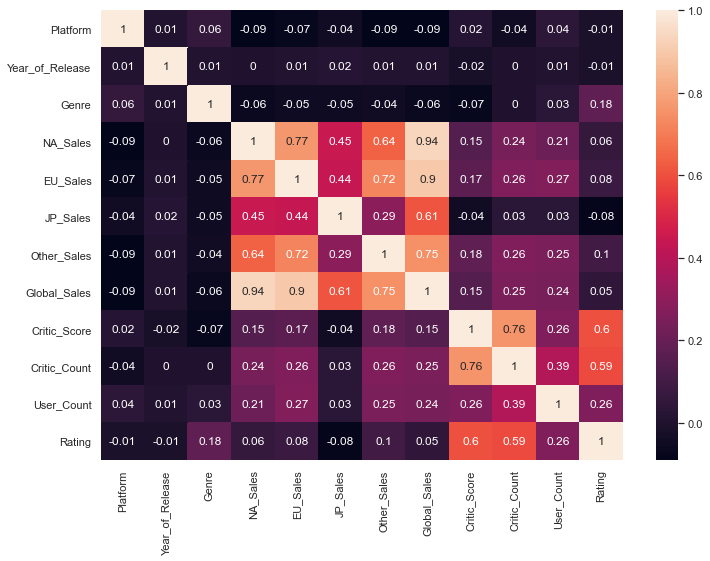

In [151]:
correlation_matrix = dataset.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [157]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_model = LinearRegression()
lin_model.fit(x_train, y_train)

LinearRegression()

In [158]:
x1_min, x1_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
x2_min, x2_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1

In [160]:
# model evaluation for training set
y_train_predict = lin_model.predict(x_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lin_model.predict(x_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2 = r2_score(y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 3.4129376456465295
R2 score is 0.0036945766549822956


The model performance for testing set
--------------------------------------
RMSE is 3.415405024669766
R2 score is 0.0015563207544690982


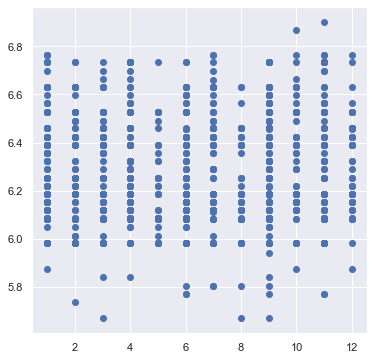

In [161]:
# plotting the y_test vs y_pred
# ideally should have been a straight line
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_test_predict)
plt.show()

0.20855384090431558
0.0018730323896674062


<ipython-input-162-aebc20aa6342>:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


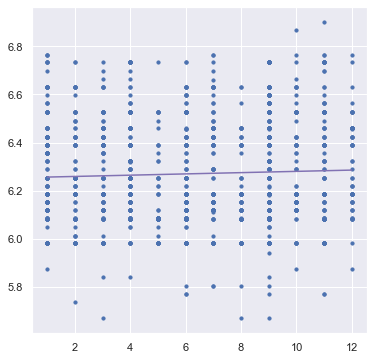

In [162]:
import operator

from sklearn.preprocessing import PolynomialFeatures

x = y_test
y = y_test_predict

# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

polynomial_features = PolynomialFeatures(degree=1)
polynomial_features_quadratic = PolynomialFeatures(degree=2)
polynomial_features_cubic = PolynomialFeatures(degree=3)

x_poly = polynomial_features.fit_transform(x)
x_quad = polynomial_features_quadratic.fit_transform(x)
x_cubic = polynomial_features_cubic.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(rmse)
print(r2)

plt.figure(figsize=(6,6))

plt.scatter(x, y, s=10)

# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')

In [15]:
min_val = dataset.mean() - (3*dataset.std())
min_val

Platform             -8.163201
Year_of_Release    2016.000000
Genre                -3.985045
NA_Sales             -2.177211
EU_Sales             -1.364825
JP_Sales             -0.848852
Other_Sales          -0.512798
Global_Sales         -4.110263
Critic_Score        -73.887140
Critic_Count        -43.209783
User_Count        -1086.437215
Rating              -15.658652
dtype: float64

In [16]:
max_val = dataset.mean() + (3*dataset.std())
max_val

Platform             27.548451
Year_of_Release    2016.000000
Genre                16.530412
NA_Sales              2.703872
EU_Sales              1.654875
JP_Sales              1.004056
Other_Sales           0.607461
Global_Sales          5.177348
Critic_Score        141.019146
Critic_Count         68.868973
User_Count         1233.733704
Rating               26.518990
dtype: float64

In [17]:
outliers = dataset[dataset > max_val]
outliers

,Platform,Year_of_Release,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,NaN,NaN,NaN,41.36,28.96,3.77,8.45,82.53,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,15.68,12.76,3.79,3.29,35.52,NaN,73.0,NaN,NaN,NaN
3,NaN,NaN,NaN,15.61,10.93,3.28,2.95,32.77,NaN,73.0,NaN,NaN,NaN
4,NaN,NaN,NaN,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16715,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16716,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
min_val = dataset['EU_Sales'].mean() - (3*dataset['EU_Sales'].std())
min_val

-1.3648250662239119

In [19]:
max_val = dataset['EU_Sales'].mean() + (3*dataset['EU_Sales'].std())
max_val

1.654874710341383

In [20]:
outliers = dataset['EU_Sales'].loc[dataset['EU_Sales'] > max_val]
outliers

0      28.96
1       3.58
2      12.76
3      10.93
4       8.89
       ...  
521     2.79
552     1.84
571     2.05
585     1.79
703     2.00
Name: EU_Sales, Length: 218, dtype: float64